# SONAR MINE DETECTION

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

# Reading in Sonar Data

In [312]:
df = pd.read_csv("/Users/rohitsuvarna/Downloads/sonar.csv",header= None)

In [313]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0190,0.0038,0.0642,0.0452,0.0333,0.0690,0.0901,0.1454,0.0740,0.0349,...,0.0093,0.0118,0.0112,0.0094,0.0140,0.0072,0.0022,0.0055,0.0122,Rock
1,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,Rock
2,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,Mine
3,0.1088,0.1278,0.0926,0.1234,0.1276,0.1731,0.1948,0.4262,0.6828,0.5761,...,0.0455,0.0213,0.0082,0.0124,0.0167,0.0103,0.0205,0.0178,0.0187,Mine
4,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,Rock


In [314]:
df[60] = df[60].map({'Mine': 1, 'Rock': 0})

In [315]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0190,0.0038,0.0642,0.0452,0.0333,0.0690,0.0901,0.1454,0.0740,0.0349,...,0.0093,0.0118,0.0112,0.0094,0.0140,0.0072,0.0022,0.0055,0.0122,0
1,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,0
2,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,1
3,0.1088,0.1278,0.0926,0.1234,0.1276,0.1731,0.1948,0.4262,0.6828,0.5761,...,0.0455,0.0213,0.0082,0.0124,0.0167,0.0103,0.0205,0.0178,0.0187,1
4,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,0


### Defining variables r,X

In [316]:
r = df[60].as_matrix()
r = r.reshape(r.shape[0],1)

In [317]:
X = df.as_matrix()[:,:60]

In [318]:
rows = df.shape[0]

In [319]:
def h(y):
    return max(1/(1 + np.exp(-1*y)),np.exp(-16))

In [320]:
hv = np.vectorize(h)

### Cross Entropy Error function

In [321]:
def cross_ent_err(r,y,lamda,w):
    r1 = r
    y1 = np.log(y)
    r2 = 1 - r
    #y2 = np.log(1-y)
    y2 = 1 - y
    low_val = y2 < np.exp(-16)
    y2[low_val] = np.exp(-16)
    y2 = np.log(y2)
    #res = np.dot(r1.T,y1) + np.dot(r2.T,y2) - 0.5*lamda*(LA.norm(w)**2)
    res = (np.dot(r1.T,y1) + np.dot(r2.T,y2)) - 0.5*lamda*(np.dot(w.T,w))
    return -1*res[0]
    

### Logistic Regression Function

In [322]:
def logistic_reg(eta,num_iters,lamda):
    w = np.ones((60,1))*0.5
    w_0 = 0.5
    err = []
    for iter_ in range(num_iters):
        y = np.dot(X,w) + w_0
        y = hv(y)
        err.append(cross_ent_err(r,y,lamda,w))
        t = (r - y).T
        w += eta*(np.dot(t,X).T - lamda*w)
        #err.append(cross_ent_err(r,y,lamda,w))
        w_0 += eta*sum(r - y)[0]
    y = np.dot(X,w) + w_0
    y = hv(y)
    err.append(cross_ent_err(r,y,lamda,w))
    return err,w,w_0
        

In [323]:
lamda_list = [0,0.05,0.1,0.2,0.3,0.4,0.5]
eta = 0.001

### Plots for various lambdas

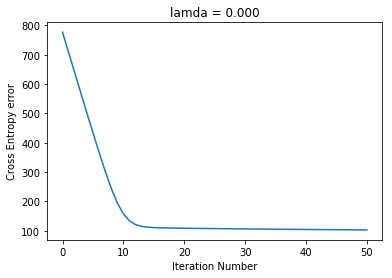

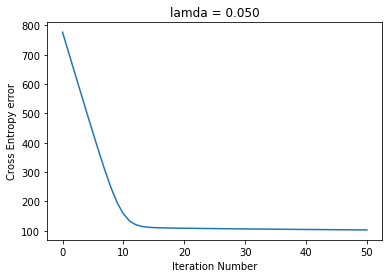

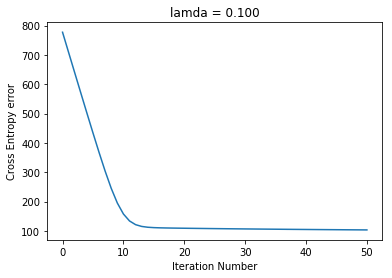

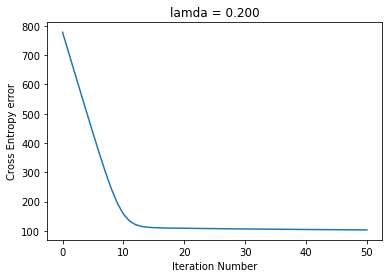

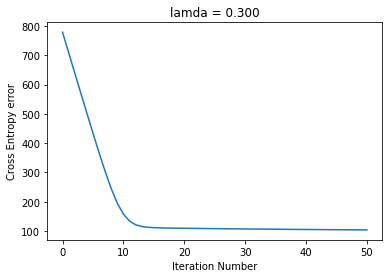

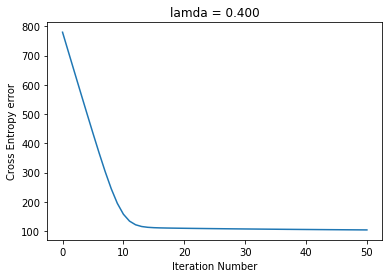

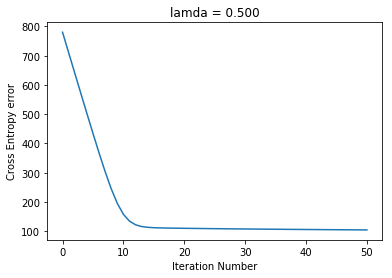

In [324]:
for lamda in lamda_list:
    error,w,w_0 = logistic_reg(eta,50,lamda)
    plt.plot(error)
    plt.xlabel('Iteration Number')
    plt.ylabel('Cross Entropy error')
    plt.title("lamda = %0.3f"%lamda)
    plt.show()

In [325]:
def class_err(eta,num_iters,lamda):
    err,w,w_0 = logistic_reg(eta,num_iters,lamda)
    pred = np.dot(X,w) + w_0
    pred = hv(pred)
    class_1 = pred > 0.5
    class_2 = pred <= 0.5
    pred[class_1] = 1
    pred[class_2] = 0 
    l = pred == r
    misses = np.count_nonzero(l == False)
    cls_err = misses/pred.shape[0]
    crs_err = err[-1][0]
    l2 = LA.norm(w)
    return crs_err,cls_err,l2
    
    
    

In [326]:
res = np.zeros((7,3))
i = 0
for lamda in lamda_list:
    res[i,:] = class_err(eta,50,lamda)
    i+= 1

In [327]:
res = pd.DataFrame(res.T)

In [328]:
res.columns = [0,0.05,0.1,0.2,0.3,0.4,0.5]

In [329]:
res

,0.0,0.05,0.1,0.2,0.3,0.4,0.5
0,102.695001,102.884414,103.072320,103.443651,103.809079,104.168684,104.522549
1,0.283333,0.283333,0.283333,0.283333,0.277778,0.277778,0.277778
2,2.615655,2.609749,2.603857,2.592117,2.580435,2.568810,2.557242


In [330]:
res = res.rename(index={res.index[0]: 'Cross entropy error'})
res = res.rename(index={res.index[1]: 'Classification Error'})
res = res.rename(index={res.index[2]: 'L2 norm'})

In [331]:
res

,0.0,0.05,0.1,0.2,0.3,0.4,0.5
Cross entropy error,102.695001,102.884414,103.072320,103.443651,103.809079,104.168684,104.522549
Classification Error,0.283333,0.283333,0.283333,0.283333,0.277778,0.277778,0.277778
L2 norm,2.615655,2.609749,2.603857,2.592117,2.580435,2.568810,2.557242


### Cross Validation

In [332]:
def logistic_reg_cv(eta,num_iters,lamda,X,r):
    w = np.ones((60,1))*0.5
    w_0 = 0.5
    err = []
    for iter_ in range(num_iters):
        y = np.dot(X,w) + w_0
        y = hv(y)
        err.append(cross_ent_err(r,y,lamda,w))
        t = (r - y).T
        w += eta*(np.dot(t,X).T - lamda*w)
        #err.append(cross_ent_err(r,y,lamda,w))
        w_0 += eta*sum(r - y)[0]
    y = np.dot(X,w) + w_0
    y = hv(y)
    err.append(cross_ent_err(r,y,lamda,w))
    return err,w,w_0

In [333]:
#5 parts of dataset
k = 5
num_iters = 50
df_parts = np.array_split(df,5)

cls_err_cv = np.zeros((1,7))
def class_err_cv(lamda):
    misses = 0
    for i in range(5):
        test = df_parts[i]
        X_test = test.as_matrix()[:,:60]
        r_test = test[60].as_matrix()
        r_test = r_test.reshape(r_test.shape[0],1)
        train = df_parts.copy()
        del train[i]
        train = pd.concat(train)
        X = train.as_matrix()[:,:60]
        r = train[60].as_matrix()
        r = r.reshape(r.shape[0],1)
        err,w,w_0 = logistic_reg_cv(eta,num_iters,lamda,X,r)
        pred = np.dot(X_test,w) + w_0
        pred = hv(pred)
        class_1 = pred > 0.5
        class_2 = pred <= 0.5
        pred[class_1] = 1
        pred[class_2] = 0 
        l = pred == r_test
        misses += np.count_nonzero(l == False)
    return misses/180

In [334]:
i = 0
for lamda in lamda_list:
       cls_err_cv[:,i] = class_err_cv(lamda)
       i = i + 1

In [335]:
cv_row = pd.DataFrame(cls_err_cv)
cv_row.columns = [0.0,0.05,0.1,0.2,0.3,0.4,0.5]
cv_row= cv_row.rename(index={cv_row.index[0]: 'Cross Val Class error'})
res = res.append(cv_row)

In [336]:
res

,0.0,0.05,0.1,0.2,0.3,0.4,0.5
Cross entropy error,102.695001,102.884414,103.072320,103.443651,103.809079,104.168684,104.522549
Classification Error,0.283333,0.283333,0.283333,0.283333,0.277778,0.277778,0.277778
L2 norm,2.615655,2.609749,2.603857,2.592117,2.580435,2.568810,2.557242
Cross Val Class error,0.333333,0.333333,0.333333,0.327778,0.327778,0.327778,0.327778
